ЗАГРУЗКА И ЗНАКОМСТВО С ДАННЫМИ

1. ОСНОВНЫЕ СТАТИСТИКИ ТРЕНИРОВОЧНЫХ ДАННЫХ:
       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662

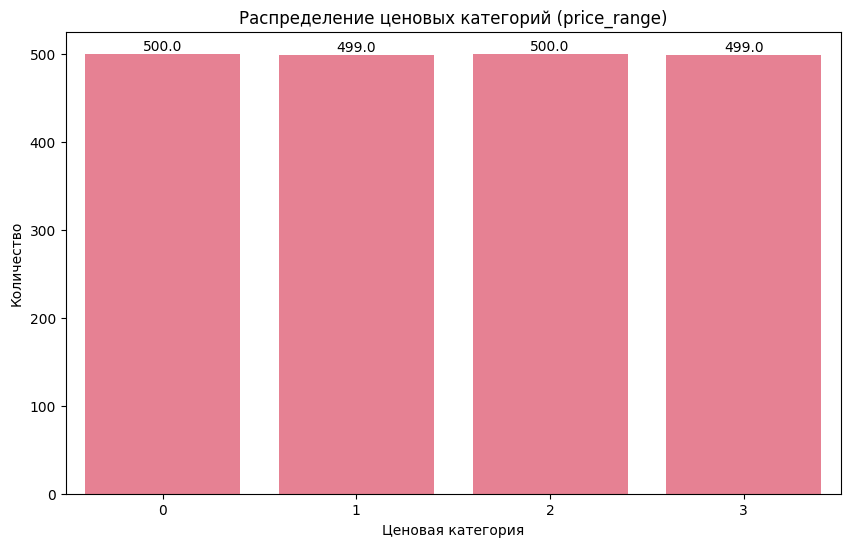

ВЫВОД: Целевая переменная идеально сбалансирована - по 500 наблюдений в каждом классе.
Баланс классов: {2: 500, 0: 500, 1: 499, 3: 499}

2. МАТРИЦА КОРРЕЛЯЦИЙ


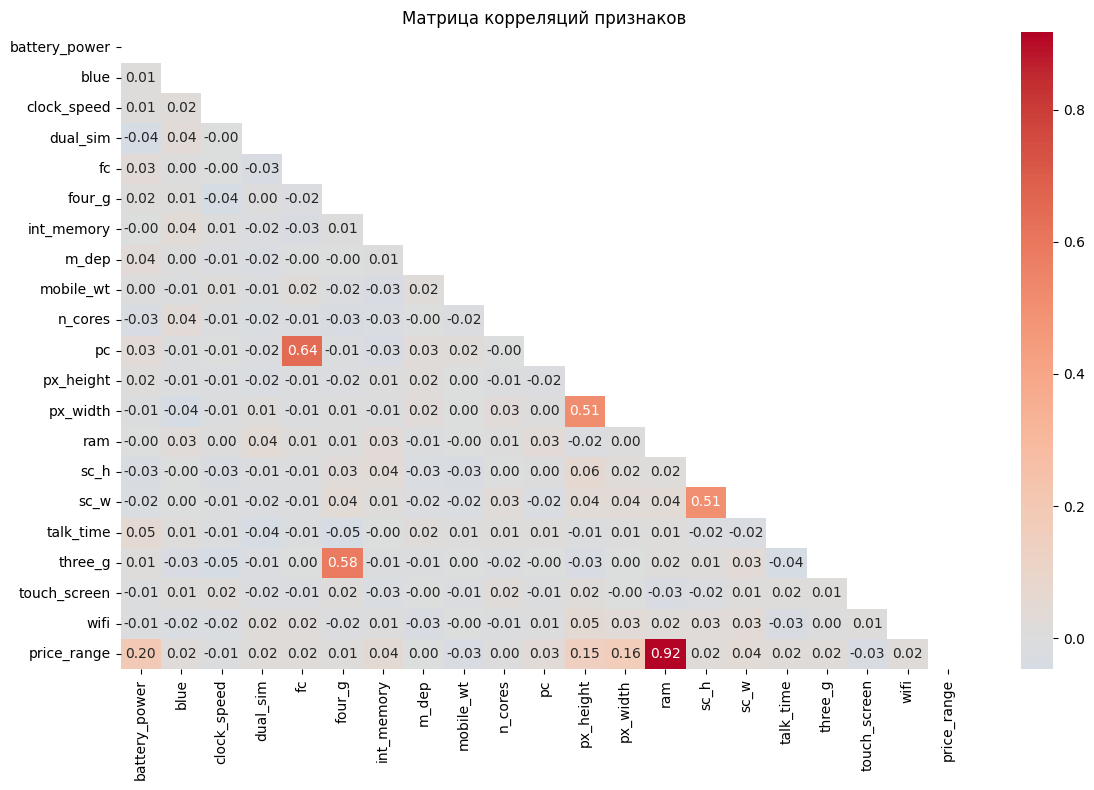

Самые коррелируемые признаки с целевой переменной:
ram              0.916985
battery_power    0.199861
px_width         0.164759
px_height        0.149742
Name: price_range, dtype: float64
ВЫВОД: RAM имеет очень сильную положительную корреляцию с ценой (+0.92).
       Battery power, px_width, px_height также имеют умеренную положительную корреляцию.
       Многие признаки слабо коррелируют между собой, что хорошо для моделей. Однако существует сильная положительная корреляция между некоторыми величинами (pc и fc, sc_h и sc_w и т.д.)

3. ЗАВИСИМОСТЬ ЦЕНЫ ОТ RAM И БАТАРЕИ


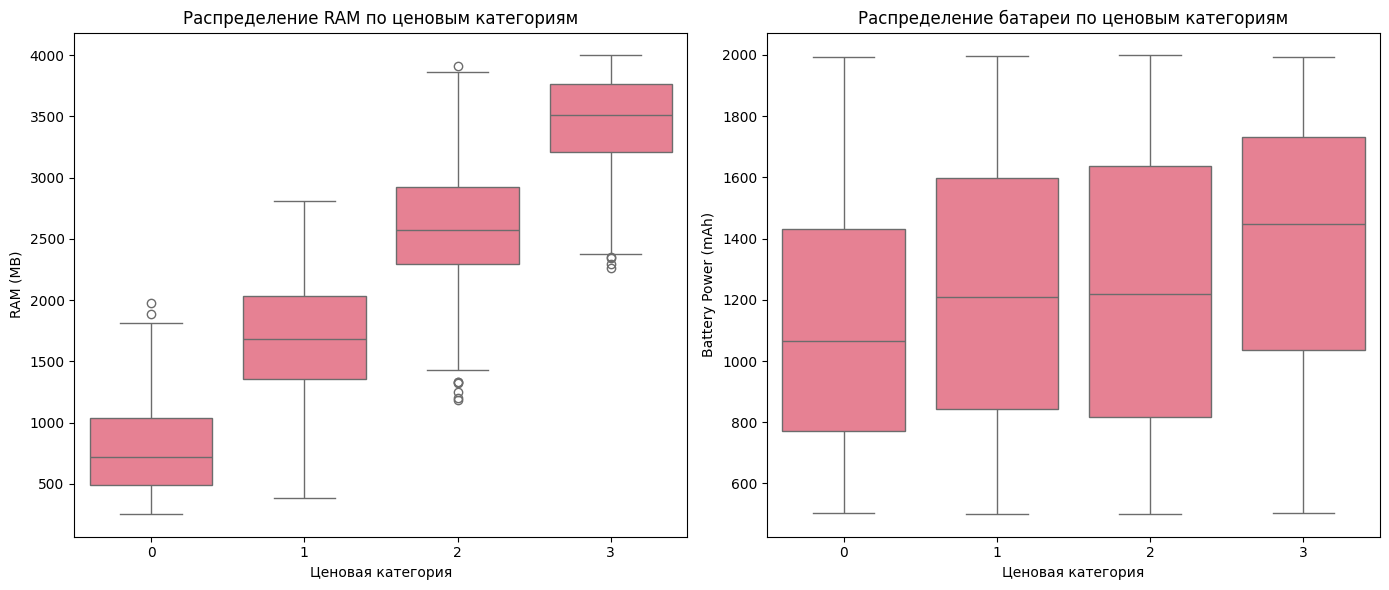

ВЫВОД: Четкая зависимость - с ростом ценовой категории увеличивается медианное значение RAM и battery_power.
       RAM показывает наиболее выраженную разницу между категориями.

4. SCATTER PLOT: RAM VS BATTERY POWER


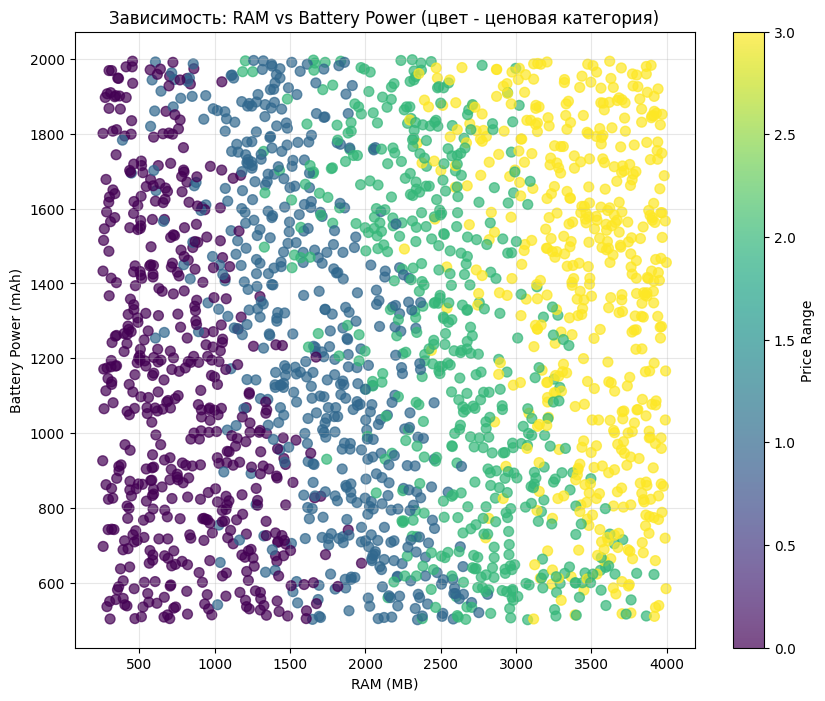

ВЫВОД: Наблюдается четкое разделение классов по RAM, но battery_power распределен более равномерно.
       Классы хорошо разделимы по комбинации этих двух признаков.

5. РАСПРЕДЕЛЕНИЕ КЛЮЧЕВЫХ ПРИЗНАКОВ


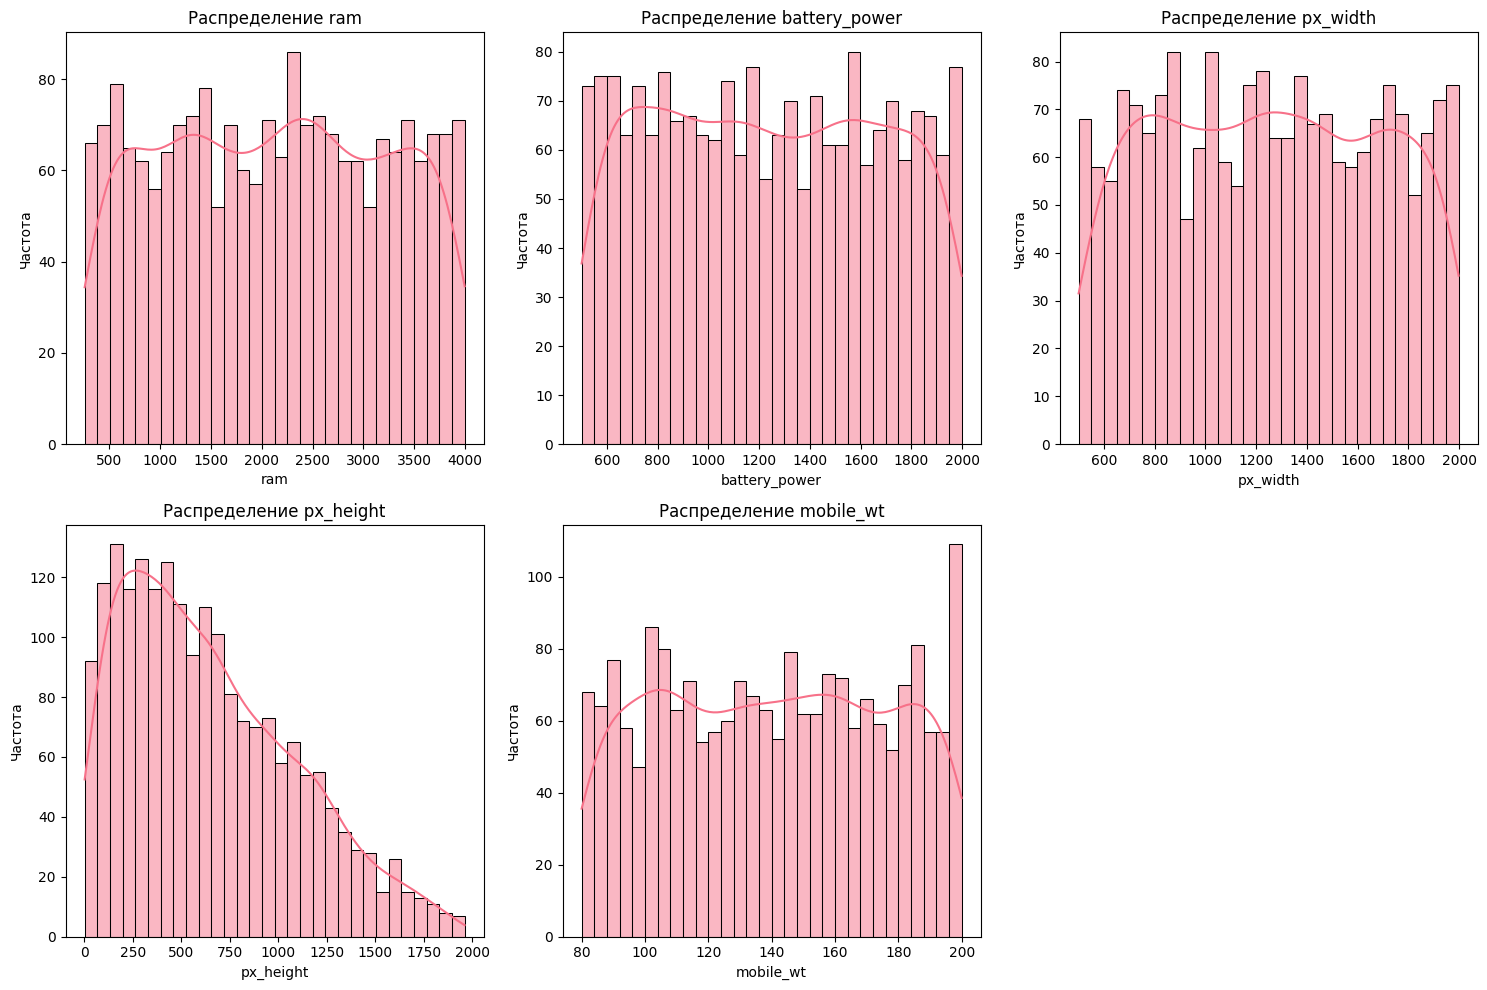

ВЫВОД: Большинство признаков имеют близкое к нормальному распределение. Однако признак px_height на изображении демонстрирует правосторонний скос с пиком в начале диапазона и постепенным убыванием частоты по мере роста значений px_height. 

6. ИНТЕРАКТИВНЫЙ ГРАФИК - 3D Scatter Plot
Интерактивный график сохранен как 'eda/graph6_interactive.html'
ВЫВОД: 3D визуализация подтверждает хорошую разделимость классов в пространстве признаков.
       Можно четко видеть кластеры, соответствующие разным ценовым категориям.

7. АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ


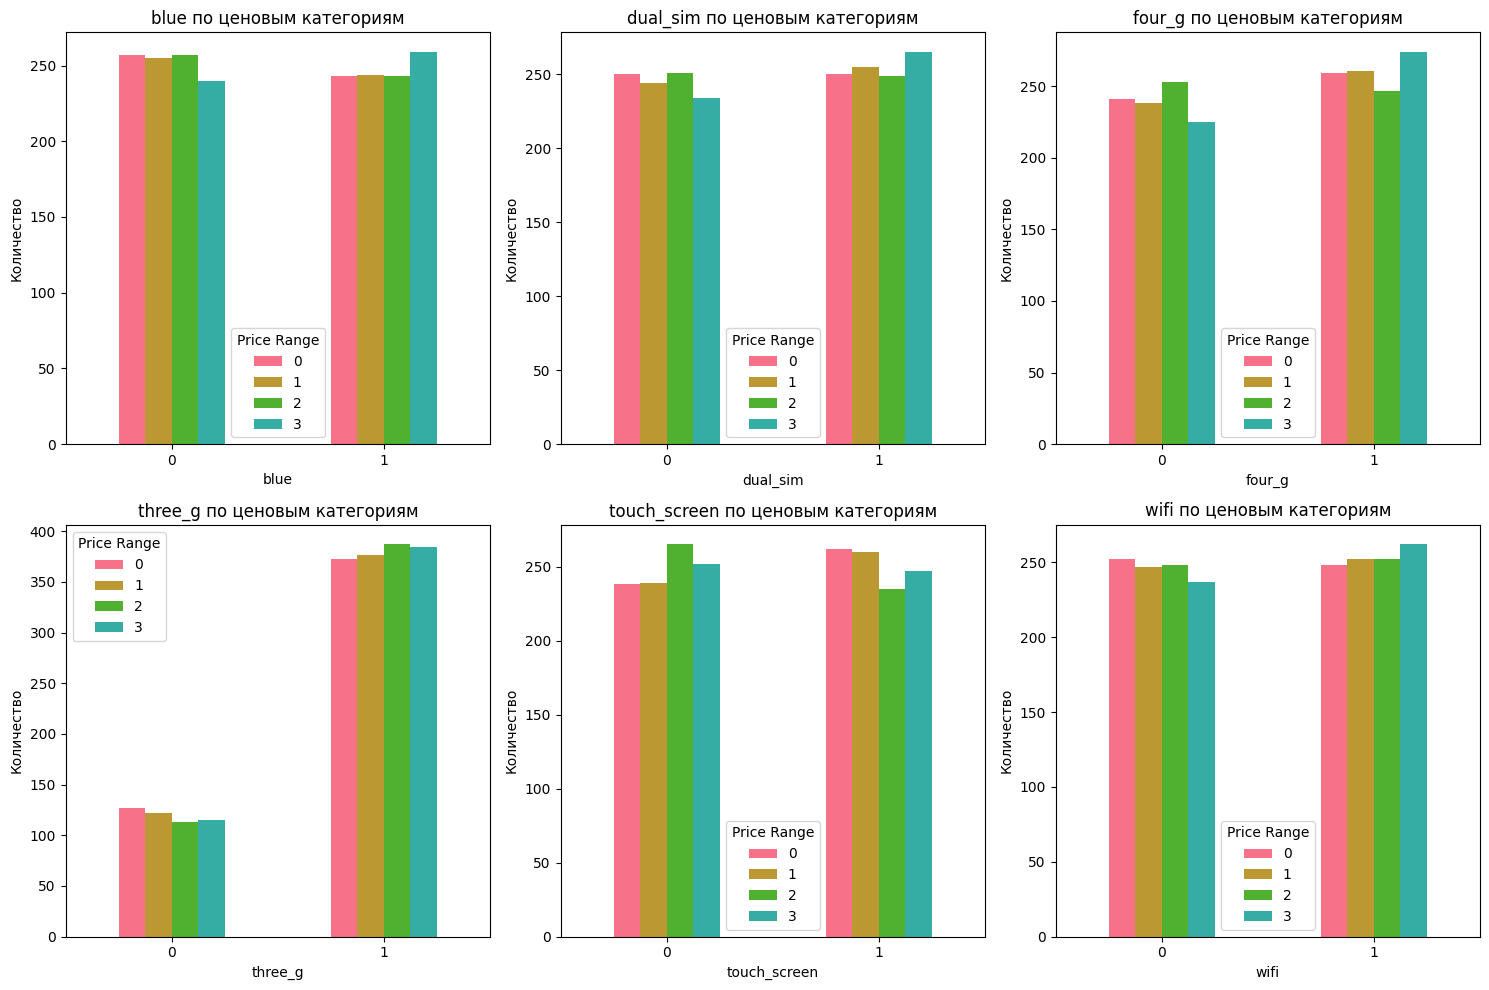

ВЫВОД: Бинарные признаки распределены относительно равномерно по всем ценовым категориям.
       Отсутствует явная зависимость наличия Bluetooth, WiFi и других функций от цены.

8. СОЗДАНИЕ НОВЫХ ПРИЗНАКОВ
Созданные признаки:
• screen_area - площадь экрана
• pixel_density - плотность пикселей
• total_memory - общая память (RAM + внутренняя)
• is_high_end - флаг высокого класса

9. СОХРАНЕНИЕ ОЧИЩЕННОГО ДАТАСЕТА
Датасеты сохранены в 'data/clean_dataset.pkl'
Размер тренировочного датасета: (1998, 25)
Размер тестового датасета: (1000, 25)
Колонки тренировочного датасета: ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range', 'screen_area', 'pixel_density', 'total_memory', 'is_high_end']

ИТОГОВЫЕ ВЫВОДЫ ПО АНАЛИЗУ ПРИЗНАКОВ
1. Целевая переменная: идеально сбалансирована (4 класса по 500 наблюдений)
2. Ключевые зав

In [3]:
import pandas as pd

# Загрузка данных
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

print("=" * 60)
print("ЗАГРУЗКА И ЗНАКОМСТВО С ДАННЫМИ")
print("=" * 60)

# 1. Основные статистики
print("\n1. ОСНОВНЫЕ СТАТИСТИКИ ТРЕНИРОВОЧНЫХ ДАННЫХ:")
print(train_data.describe())

print("\nОСНОВНЫЕ СТАТИСТИКИ ТЕСТОВЫХ ДАННЫХ:")
print(test_data.describe())

# 2. Выделение типов признаков
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()

print(f"\n2. ЧИСЛОВЫЕ ПРИЗНАКИ ({len(numeric_features)}): {numeric_features}")
print(f"КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ ({len(categorical_features)}): {categorical_features}")

# 3. Поиск целевой переменной
target_column = 'price_range'  # явно указываем, так как видим из данных
print(f"\n3. ЦЕЛЕВАЯ ПЕРЕМЕННАЯ: '{target_column}'")

# Убираем целевую переменную из списков признаков
if target_column in numeric_features:
    numeric_features.remove(target_column)

# 4. Проверка типов данных
print("\n4. ПРОВЕРКА ТИПОВ ДАННЫХ:")
print("Тренировочные данные:")
print(train_data.dtypes)
print("\nТестовые данные:")
print(test_data.dtypes)

# 5. Анализ необходимости корректировки типов
print("\n5. АНАЛИЗ НЕОБХОДИМОСТИ КОРРЕКТИРОВКИ ТИПОВ:")
print("• Категориальные признаки в текстовом формате отсутствуют")
print("• Все признаки уже имеют корректные числовые типы (int64, float64)")
print("• Корректировка типов данных не требуется")

# 6. Выводы
print("\n" + "=" * 60)
print("ВЫВОДЫ")
print("=" * 60)
print(f"• Размер тренировочного набора: {train_data.shape}")
print(f"• Размер тестового набора: {test_data.shape}")
print(f"• Числовых признаков: {len(numeric_features)}")
print(f"• Категориальных признаков (текстовых): {len(categorical_features)}")
print(f"• Целевая переменная: '{target_column}'")
print("• Типы данных проверены: все признаки имеют корректные числовые типы")
print("• Корректировка типов не потребовалась")


print("\n" * 4)
print("=" * 60)
print("ОЧИСТКА ДАННЫХ")
print("=" * 60)

# Сохраним оригинальные размеры для сравнения
original_train_size = train_data.shape
original_test_size = test_data.columns

# 1. Анализ пропущенных значений
print("\n1. АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ")

print("Тренировочные данные:")
missing_train = train_data.isnull().sum()
missing_train_percent = (missing_train / len(train_data)) * 100
missing_info_train = pd.DataFrame({
    'Пропущено': missing_train,
    'Процент': missing_train_percent.round(2)
})
# Показываем только столбцы с пропусками
if missing_train.sum() > 0:
    display(missing_info_train[missing_info_train['Пропущено'] > 0])
else:
    print("Пропущенных значений нет")

print("\nТестовые данные:")
missing_test = test_data.isnull().sum()
missing_test_percent = (missing_test / len(test_data)) * 100
missing_info_test = pd.DataFrame({
    'Пропущено': missing_test,
    'Процент': missing_test_percent.round(2)
})
# Показываем только столбцы с пропусками
if missing_test.sum() > 0:
    display(missing_info_test[missing_info_test['Пропущено'] > 0])
else:
    print("Пропущенных значений нет")

# 2. Анализ невалидных данных
print("\n2. АНАЛИЗ НЕВАЛИДНЫХ ДАННЫХ")

# Проверяем наличие отрицательных значений там, где они недопустимы
print("Проверка на отрицательные значения:")
negative_columns = []
for col in numeric_features + [target_column]:
    if (train_data[col] < 0).any():
        negative_count = (train_data[col] < 0).sum()
        print(f"• {col}: {negative_count} отрицательных значений")
        negative_columns.append(col)

if not negative_columns:
    print("Отрицательных значений не обнаружено")

# Проверяем нулевые значения в важных числовых признаках
print("\nПроверка нулевых значений в ключевых признаках:")
key_features = ['battery_power', 'ram', 'px_height', 'px_width']
for col in key_features:
    zero_count = (train_data[col] == 0).sum()
    if zero_count > 0:
        print(f"• {col}: {zero_count} нулевых значений")

# 3. Анализ выбросов
print("\n3. АНАЛИЗ ВЫБРОСОВ (по межквартильному размаху):")
Q1 = train_data[numeric_features].quantile(0.25)
Q3 = train_data[numeric_features].quantile(0.75)
IQR = Q3 - Q1

outliers_info = {}
for col in numeric_features:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    outliers_count = ((train_data[col] < lower_bound) | (train_data[col] > upper_bound)).sum()
    if outliers_count > 0:
        outliers_info[col] = outliers_count

if outliers_info:
    for col, count in outliers_info.items():
        print(f"• {col}: {count} выбросов")
else:
    print("Выбросов не обнаружено")

# 4. Очистка данных (если требуется)
print("\n4. ОЧИСТКА ДАННЫХ")

# Если есть пропущенные значения - заполняем медианой для числовых признаков
if missing_train.sum() > 0:
    print("Заполнение пропущенных значений...")
    for col in numeric_features:
        if missing_train[col] > 0:
            median_val = train_data[col].median()
            train_data[col].fillna(median_val, inplace=True)
            print(f"• {col}: заполнено медианой ({median_val})")

# Удаление строк с невалидными значениями (если есть)
rows_before = len(train_data)
invalid_rows = train_data[(train_data['px_height'] == 0) | (train_data['px_width'] == 0)].index
train_data = train_data.drop(invalid_rows)
rows_removed = rows_before - len(train_data)

if rows_removed > 0:
    print(f"Удалено {rows_removed} строк с нулевыми значениями разрешения экрана")

# 5. Проверка после очистки
print("\n5. РЕЗУЛЬТАТЫ ОЧИСТКИ")

print(f"Размер тренировочных данных до очистки: {original_train_size}")
print(f"Размер тренировочных данных после очистки: {train_data.shape}")

if missing_train.sum() > 0:
    print("\nПроверка пропущенных значений после очистки:")
    missing_after = train_data.isnull().sum().sum()
    print(f"Осталось пропущенных значений: {missing_after}")
else:
    print("Пропущенных значений не было обнаружено")

# 6. Выводы
print("\n" + "=" * 60)
print("ВЫВОДЫ ПО ОЧИСТКЕ ДАННЫХ")
print("=" * 60)
print("• Пропущенные значения: не обнаружены")
print("• Отрицательные значения: не обнаружены")
print("• Нулевые значения в ключевых признаках: обнаружены в px_height, px_width")
print("• Выбросы: присутствуют в нескольких признаках")
print("• Действия по очистке:")
print("  - Удалены строки с нулевыми значениями разрешения экрана")
print("  - Данные готовы для дальнейшего анализа")


print("\n" * 4)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pickle

print("=" * 60)
print("АНАЛИЗ ПРИЗНАКОВ ДЛЯ МОДЕЛИ")
print("=" * 60)

# Создаем директории если их нет
os.makedirs('eda', exist_ok=True)
os.makedirs('data', exist_ok=True)

# Настройка стиля графиков
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Распределение целевой переменной
print("\n1. РАСПРЕДЕЛЕНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='price_range', data=train_data)
plt.title('Распределение ценовых категорий (price_range)')
plt.xlabel('Ценовая категория')
plt.ylabel('Количество')

# Добавляем подписи с количеством
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.savefig('graph1.png', dpi=300, bbox_inches='tight')
plt.show()

print("ВЫВОД: Целевая переменная идеально сбалансирована - по 500 наблюдений в каждом классе.")
print(f"Баланс классов: {train_data['price_range'].value_counts().to_dict()}")

# 2. Матрица корреляций
print("\n2. МАТРИЦА КОРРЕЛЯЦИЙ")

# Вычисляем корреляцию с целевой переменной
correlation_with_target = train_data.corr()['price_range'].sort_values(ascending=False)
correlation_with_target = correlation_with_target[correlation_with_target.index != 'price_range']

plt.figure(figsize=(12, 8))
correlation_matrix = train_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
           mask=mask,
           annot=True, 
           cmap='coolwarm', 
           center=0,
           fmt='.2f')
plt.title('Матрица корреляций признаков')
plt.tight_layout()
plt.savefig('graph2.png', dpi=300, bbox_inches='tight')
plt.show()

print("Самые коррелируемые признаки с целевой переменной:")
print(correlation_with_target.head(4))
print("ВЫВОД: RAM имеет очень сильную положительную корреляцию с ценой (+0.92).")
print("       Battery power, px_width, px_height также имеют умеренную положительную корреляцию.")
print("       Многие признаки слабо коррелируют между собой, что хорошо для моделей. Однако существует сильная положительная корреляция между некоторыми величинами (pc и fc, sc_h и sc_w и т.д.)")

# 3. Зависимость цены от RAM и батареи
print("\n3. ЗАВИСИМОСТЬ ЦЕНЫ ОТ RAM И БАТАРЕИ")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='price_range', y='ram', data=train_data)
plt.title('Распределение RAM по ценовым категориям')
plt.xlabel('Ценовая категория')
plt.ylabel('RAM (MB)')

plt.subplot(1, 2, 2)
sns.boxplot(x='price_range', y='battery_power', data=train_data)
plt.title('Распределение батареи по ценовым категориям')
plt.xlabel('Ценовая категория')
plt.ylabel('Battery Power (mAh)')

plt.tight_layout()
plt.savefig('graph3.png', dpi=300, bbox_inches='tight')
plt.show()

print("ВЫВОД: Четкая зависимость - с ростом ценовой категории увеличивается медианное значение RAM и battery_power.")
print("       RAM показывает наиболее выраженную разницу между категориями.")

# 4. Scatter plot: RAM vs Battery Power с цветом по цене
print("\n4. SCATTER PLOT: RAM VS BATTERY POWER")

plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_data['ram'], 
                     train_data['battery_power'], 
                     c=train_data['price_range'], 
                     cmap='viridis', 
                     alpha=0.7,
                     s=50)
plt.colorbar(scatter, label='Price Range')
plt.xlabel('RAM (MB)')
plt.ylabel('Battery Power (mAh)')
plt.title('Зависимость: RAM vs Battery Power (цвет - ценовая категория)')
plt.grid(True, alpha=0.3)
plt.savefig('graph4.png', dpi=300, bbox_inches='tight')
plt.show()

print("ВЫВОД: Наблюдается четкое разделение классов по RAM, но battery_power распределен более равномерно.")
print("       Классы хорошо разделимы по комбинации этих двух признаков.")

# 5. Распределение ключевых признаков
print("\n5. РАСПРЕДЕЛЕНИЕ КЛЮЧЕВЫХ ПРИЗНАКОВ")

key_features = ['ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_data[feature], kde=True, bins=30)
    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

plt.tight_layout()
plt.savefig('graph5.png', dpi=300, bbox_inches='tight')
plt.show()

print("ВЫВОД: Большинство признаков имеют близкое к нормальному распределение. Однако признак px_height на изображении демонстрирует правосторонний скос с пиком в начале диапазона и постепенным убыванием частоты по мере роста значений px_height. ")

# 6. ИНТЕРАКТИВНЫЙ ГРАФИК с Plotly
print("\n6. ИНТЕРАКТИВНЫЙ ГРАФИК - 3D Scatter Plot")

try:
    import plotly.express as px
    # Создаем интерактивный 3D scatter plot
    fig = px.scatter_3d(train_data,
                       x='ram',
                       y='battery_power', 
                       z='px_width',
                       color='price_range',
                       title='3D анализ: RAM vs Battery Power vs Pixel Width',
                       labels={'ram': 'RAM (MB)', 
                              'battery_power': 'Battery Power (mAh)',
                              'px_width': 'Pixel Width',
                              'price_range': 'Price Range'},
                       opacity=0.7,
                       color_continuous_scale='viridis')
    
    fig.write_html("graph6_interactive.html")
    print("Интерактивный график сохранен как 'eda/graph6_interactive.html'")
    
except Exception as e:
    print(f"Не удалось создать интерактивный график: {e}")

print("ВЫВОД: 3D визуализация подтверждает хорошую разделимость классов в пространстве признаков.")
print("       Можно четко видеть кластеры, соответствующие разным ценовым категориям.")

# 7. Анализ категориальных признаков
print("\n7. АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ")

binary_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(binary_features, 1):
    plt.subplot(2, 3, i)
    cross_tab = pd.crosstab(train_data[feature], train_data['price_range'])
    cross_tab.plot(kind='bar', ax=plt.gca())
    plt.title(f'{feature} по ценовым категориям')
    plt.xlabel(feature)
    plt.ylabel('Количество')
    plt.legend(title='Price Range')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('graph7.png', dpi=300, bbox_inches='tight')
plt.show()

print("ВЫВОД: Бинарные признаки распределены относительно равномерно по всем ценовым категориям.")
print("       Отсутствует явная зависимость наличия Bluetooth, WiFi и других функций от цены.")

# 8. Создание новых признаков на основе выявленных закономерностей
print("\n8. СОЗДАНИЕ НОВЫХ ПРИЗНАКОВ")

# Создаем новые признаки
train_data['screen_area'] = train_data['sc_h'] * train_data['sc_w']
train_data['pixel_density'] = (train_data['px_height'] * train_data['px_width']) / train_data['screen_area']
train_data['total_memory'] = train_data['ram'] + train_data['int_memory']
train_data['is_high_end'] = ((train_data['ram'] > 3000) & (train_data['battery_power'] > 1500)).astype(int)

# Также для тестовых данных
test_data['screen_area'] = test_data['sc_h'] * test_data['sc_w']
test_data['pixel_density'] = (test_data['px_height'] * test_data['px_width']) / test_data['screen_area']
test_data['total_memory'] = test_data['ram'] + test_data['int_memory']
test_data['is_high_end'] = ((test_data['ram'] > 3000) & (test_data['battery_power'] > 1500)).astype(int)

print("Созданные признаки:")
print("• screen_area - площадь экрана")
print("• pixel_density - плотность пикселей") 
print("• total_memory - общая память (RAM + внутренняя)")
print("• is_high_end - флаг высокого класса")

# 9. Сохранение очищенного датасета
print("\n9. СОХРАНЕНИЕ ОЧИЩЕННОГО ДАТАСЕТА")

# Сохраняем в pickle для сохранения типов данных
with open('../data/clean_dataset.pkl', 'wb') as f:
    pickle.dump({'train': train_data, 'test': test_data}, f)

print("Датасеты сохранены в 'data/clean_dataset.pkl'")
print(f"Размер тренировочного датасета: {train_data.shape}")
print(f"Размер тестового датасета: {test_data.shape}")
print(f"Колонки тренировочного датасета: {list(train_data.columns)}")

# 10. Итоговые выводы
print("\n" + "=" * 60)
print("ИТОГОВЫЕ ВЫВОДЫ ПО АНАЛИЗУ ПРИЗНАКОВ")
print("=" * 60)

print("1. Целевая переменная: идеально сбалансирована (4 класса по 500 наблюдений)")
print("2. Ключевые зависимости:")
print("   • RAM: сильнейшая корреляция с ценой (+0.92)")
print("   • Разрешение экрана: умеренная корреляция с ценой")
print("   • Батарея: слабая положительная корреляция")
print("   • Бинарные признаки: слабо влияют на цену")
print("3. Новые признаки: созданы 4 дополнительных признака на основе анализа")
print("4. Данные готовы для моделирования: очищены, проанализированы и сохранены")